In [136]:
import numpy as np
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# df = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\bank.csv', sep = ';')
df = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\bank.csv', sep = ';')

df['y'] = df['y'].str.replace('yes', '1')
df['y'] = df['y'].str.replace('no', '0')

df['y'] = df['y'].astype(int)

df['range'] = pd.cut(df['duration'], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 3100])
# df['range'] = pd.cut(df['duration'], [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 3200])

month_index = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
          'aug', 'sep', 'oct', 'nov', 'dec']

print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  \
0  cellular   19   oct        79         1     -1         0  unknown  0   
1  cellular   11   may       220         1    339         4  failure  0   
2  cellular   16   apr       185         1    330         1  failure  0   
3   unknown    3   jun       199         4     -1         0  unknown  0   
4   unknown    5   may       226         1     -1         0  unknown  0   

        range  
0    (0, 100]  
1  (200, 300]  
2  (100, 200]  
3  (100, 200]  
4  (200, 300]  


Source of dataset:
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

"The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed."

First we're going to explore the distribution of several variables below.

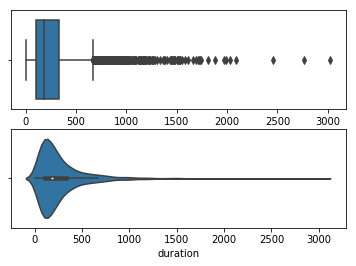

In [125]:
f, axes = plt.subplots(2, 1)
box = sns.boxplot(x = df['duration'], ax=axes[0])
vio = sns.violinplot(x = df['duration'], ax=axes[1])

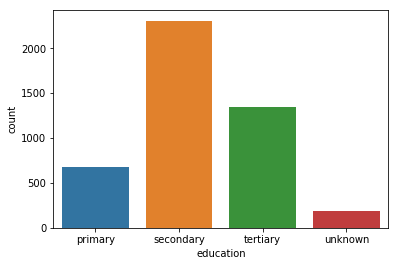

In [111]:
month_cnt = sns.countplot(x = df['education'])

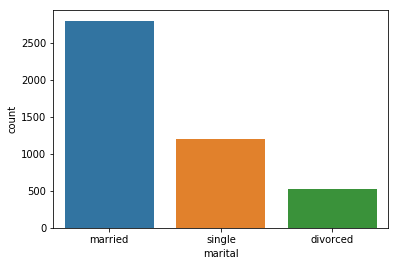

In [113]:
month_cnt = sns.countplot(x = df['marital'])

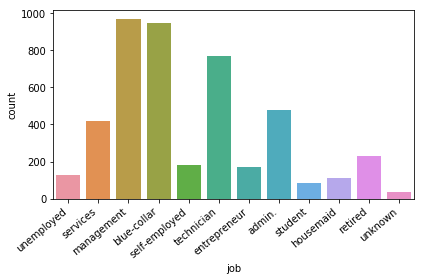

In [122]:
month_cnt = sns.countplot(x = df['job'])
month_cnt.set_xticklabels(month_cnt.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

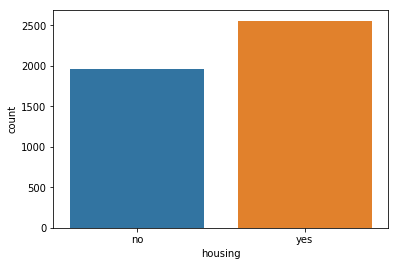

In [115]:
month_cnt = sns.countplot(x = df['housing'])

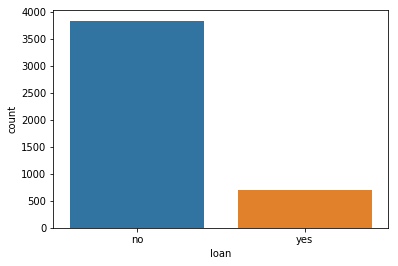

In [116]:
month_cnt = sns.countplot(x = df['loan'])

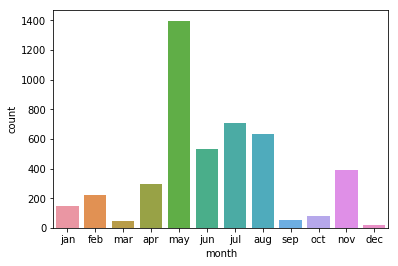

In [109]:
month_cnt = sns.countplot(x = df['month'], order = month_index)

Now that we have a general feel for what the variables are and how they're represented, I'm going to dig into the success rate the bank had with the various groups and see if any of the figures stand out to me.

In [146]:
ranges = df.groupby('range')['y'].agg({'Deposited' : 'sum', 'Total in Range' : 'count', 'Success Rate' : 'mean', 'Standard Deviation' : 'std'})
education = df.groupby('education')['y'].agg({'Deposited' : 'sum', 'Total' : 'count', 'Success Rate' : 'mean', 'Standard Deviation' : 'std'})
marital = df.groupby('marital')['y'].agg({'Deposited' : 'sum', 'Total' : 'count', 'Success Rate' : 'mean', 'Standard Deviation' : 'std'})
job = df.groupby('job')['y'].agg({'Deposited' : 'sum', 'Total' : 'count', 'Success Rate' : 'mean', 'Standard Deviation' : 'std'})
housing = df.groupby('housing')['y'].agg({'Deposited' : 'sum', 'Total' : 'count', 'Success Rate' : 'mean', 'Standard Deviation' : 'std'})
loan = df.groupby('loan')['y'].agg({'Deposited' : 'sum', 'Total' : 'count', 'Success Rate' : 'mean', 'Standard Deviation' : 'std'})
month = df.groupby('month')['y'].agg({'Deposited' : 'sum', 'Total' : 'count', 'Success Rate' : 'mean', 'Standard Deviation' : 'std'})

month = month.reindex(month_index)

print(ranges)
print(education)
print(marital)
print(job)
print(housing)
print(loan)
print(month)

# Ignore below
# yes = df.groupby('range')['y'].sum()
# tot = df.groupby('range')['y'].count()
# perc = df.groupby('range')['y'].sum()/df.groupby('range')['y'].count()
# y = df.groupby('range')['y'].sum().reset_index(name ='Count')

              Deposited  Total in Range  Success Rate  Standard Deviation
range                                                                    
(0, 100]             15            1070      0.014019            0.117623
(100, 200]           54            1360      0.039706            0.195339
(200, 300]           96             828      0.115942            0.320349
(300, 400]           70             428      0.163551            0.370301
(400, 500]           56             241      0.232365            0.423220
(500, 600]           40             172      0.232558            0.423696
(600, 700]           40             134      0.298507            0.459320
(700, 800]           38              91      0.417582            0.495893
(800, 900]           30              47      0.638298            0.485688
(900, 1000]          21              43      0.488372            0.505781
(1000, 1100]         18              29      0.620690            0.493804
(1100, 1200]         10              2

C:\Users\Pat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Users\Pat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\Users\Pat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\Users\Pat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation

I noted right away the relationship between call duration and success rate. But's important to keep the difference between correlation and causation in mind here. The people are staying on the line more due to their higher level of interest in putting down a deposit, I doubt it's the other way around. I suppose there could be a case made for a deep dive into the relationship between the two, but that didn't really hit home with me so I moved on.

The two variables with the most notable difference in success rates were the "Housing" and "Loan" variables. That is, whether the person has a housing loan or personal loan respectively.

To dig into this furhter, below I performed a T-Test on the variables to see if it prompted a further look.

In [149]:
print('Housing T-Test Results')
print(stats.ttest_ind(df[df['housing'] == 'no'].y, df[df['housing'] == 'yes'].y))
print('')
print('Loan T-Test Results')
print(stats.ttest_ind(df[df['loan'] == 'no'].y, df[df['loan'] == 'yes'].y))

Housing T-Test Results
Ttest_indResult(statistic=7.076064115727637, pvalue=1.711296675905455e-12)

Loan T-Test Results
Ttest_indResult(statistic=4.7522327881373, pvalue=2.0742845898963875e-06)


The T-Test has spoken. Housing loans seem to be related to the bank's success rate in getting the client to put down a deposit, so that will be the subject of my proposed experiment.

**I don't know the marketing strategies taken by the bank, and I don't know whether their audience is a product of design or a result of the population distribution itself, so for the sake of this assignment I'll be filling in some of the blanks at my discretion.*

Experiment Proposal:

*The Problem*

How can we (the bank) run a more successful marketing campaign? These campaigns eat up countless hours calling people in the hopes they'll decide to put down a deposit with us. The aim of this experiment is to more make this process more time-efficient, targeting people more likely to have an interest in using us as their bank of choice. 

*Hypothesis*

People with housing loans are more likely to put down a deposit with us, and thus the marketing campaign should place a stronger focus on this group.

*The Experiment*

I propose we put in more groundwork in the early stages of the marketing campaign to focus on those that have a housing loan. The percentage as of now is slightly leaning in that direction, but it is unclear if that is a design of the current structure of the campaign or a result of the characteristics of the population itself.

We will split our sales team into two units, and this will be an A/B manipulation where there will be team with a pre-meditated focus on those with housing loans and team that proceeds under the current protocal structure. We'll call them Team A and Team B respectovely.

As of now, 56.6% of the clients the sales team reaches out to has a housing loan. The Team A's goal will be to get that number up to 75% for a total of two months. If the new team maintains the current 8% advantage the housing loan group has over the non-housing loan group with the new mix of client population, their marketing philosophy will be adopted by Team B. If that discrepancy falls in any way, we'll continue the experiment for another 2 months. If the discrepancy after that is still below the current 8%, Team A will revert back to Team B's marketing philosphy.
